In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)
dataset=pd.read_excel('dataset.xlsx')
print(dataset.shape)

(5644, 111)


In [3]:
df=dataset.copy()
print(df.groupby('Influenza A'))

Exploratory Data Analysis

Objectif: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.

I - Analyse de la forme:
	§ Identification de la target: SARS-Cov-2 exam result
	§ Nombre des lignes et de colonnes: (5644, 111)
	§ Identification des valeurs manquantes: 
	§ Types de variables:

II - Analyse du fond:
	§ Visualisation de la target (histogramme/boxplot)
	§ Compréhension des différentes variables (recherche)
	§ Visualisation des relations : features/target
	§ Identification des outliers


Pre-processing

Objectif: transformer le data pour le mettre dans un format propice au machine learning

	§ Création du Train Set / Test Set
	§ Élimination des NaN : dropna(), imputation, colonne"vides"
	§ Encodage
	§ Suppression des outliers néfastes au modèle
	§ Feature selection
	§ Feature engineering
	§ Feature scaling

Modelling

Objectif: développer un modèle de machine learning capable de répondre a l'objectif final.

	§ Définir une fonction d'évaluation
	§ Entrainement de différents modèles
	§ Optimisation avec GridSearchCV
	§ Analyse des erreurs et retour au Preprocessing / EDA
           Learning Curve et prise de décision

df.dtypes

In [4]:
df.describe()

Patient age quantile  Patient addmited to regular ward (1=yes, 0=no)  \
count           5644.000000                                     5644.000000   
mean               9.318391                                        0.013997   
std                5.777903                                        0.117489   
min                0.000000                                        0.000000   
25%                4.000000                                        0.000000   
50%                9.000000                                        0.000000   
75%               14.000000                                        0.000000   
max               19.000000                                        1.000000   

       Patient addmited to semi-intensive unit (1=yes, 0=no)  \
count                                        5644.000000       
mean                                            0.008859       
std                                             0.093713       
min                                             0.000000       
25%                                             0.000000       
50%                                             0.000000       
75%                                             0.000000       
max                                             1.000000       

       Patient addmited to intensive care unit (1=yes, 0=no)    Hematocrit  \
count                                        5644.000000      6.030000e+02   
mean                                            0.007264     -2.186214e-09   
std                                             0.084929      1.000830e+00   
min                                             0.000000     -4.501420e+00   
25%                                             0.000000     -5.188074e-01   
50%                                             0.000000      5.340703e-02   
75%                                             0.000000      7.171751e-01   
max                                             1.000000      2.662704e+00   

         Hemoglobin     Platelets  Mean platelet volume   Red blood Cells  \
count  6.030000e+02  6.020000e+02           5.990000e+02     6.020000e+02   
mean  -1.601319e-08 -3.535004e-10           7.438142e-09     8.424447e-09   
std    1.000830e+00  1.000832e+00           1.000836e+00     1.000832e+00   
min   -4.345603e+00 -2.552426e+00          -2.457575e+00    -3.970608e+00   
25%   -5.862439e-01 -6.053457e-01          -6.624832e-01    -5.679496e-01   
50%    4.031596e-02 -1.217160e-01          -1.015171e-01     1.385207e-02   
75%    7.295320e-01  5.314981e-01           6.838353e-01     6.661759e-01   
max    2.671868e+00  9.532034e+00           3.713052e+00     3.645706e+00   

        Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  \
count  6.020000e+02                                      6.020000e+02   
mean  -7.866736e-09                                      1.014863e-09   
std    1.000832e+00                                      1.000832e+00   
min   -1.865070e+00                                     -5.431808e+00   
25%   -7.307069e-01                                     -5.524761e-01   
50%   -1.426696e-02                                     -5.458523e-02   
75%    5.976919e-01                                      6.424628e-01   
max    3.764100e+00                                      3.331071e+00   

         Leukocytes     Basophils  Mean corpuscular hemoglobin (MCH)  \
count  6.020000e+02  6.020000e+02                       6.020000e+02   
mean   6.215833e-09 -6.633740e-09                      -3.453010e-09   
std    1.000832e+00  1.000832e+00                       1.000832e+00   
min   -2.020303e+00 -1.140144e+00                      -5.937604e+00   
25%   -6.372547e-01 -5.292256e-01                      -5.013556e-01   
50%   -2.128790e-01 -2.237665e-01                       1.259032e-01   
75%    4.542955e-01  3.871516e-01                       5.963475e-01   
max    4.522042e+00  1.107822e+01                       4.098546e+00   

        Eosino

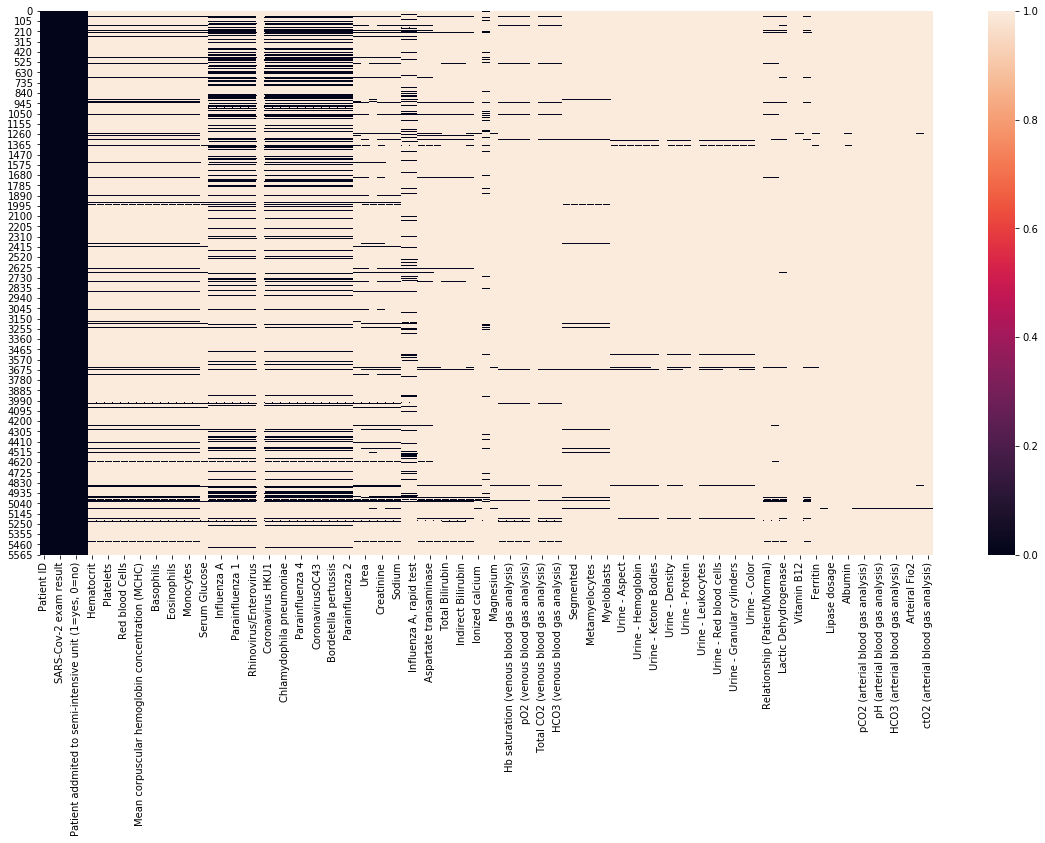

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [6]:
df=df[df.columns[df.isna().mean()<0.90]]
df.isna().mean()


Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpu

In [7]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [8]:
df.select_dtypes('float')

Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
0            NaN         NaN        NaN                    NaN   
1       0.236515   -0.022340  -0.517413               0.010677   
2            NaN         NaN        NaN                    NaN   
3            NaN         NaN        NaN                    NaN   
4            NaN         NaN        NaN                    NaN   
...          ...         ...        ...                    ...   
5639         NaN         NaN        NaN                    NaN   
5640         NaN         NaN        NaN                    NaN   
5641         NaN         NaN        NaN                    NaN   
5642         NaN         NaN        NaN                    NaN   
5643    0.694287    0.541564  -0.906829              -0.325903   

      Red blood Cells  Lymphocytes  \
0                 NaN          NaN   
1            0.102004     0.318366   
2                 NaN          NaN   
3                 NaN          NaN   
4                 NaN          NaN   
...               ...          ...   
5639              NaN          NaN   
5640              NaN          NaN   
5641              NaN          NaN   
5642              NaN          NaN   
5643         0.578024    -0.295726   

      Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                                  NaN         NaN        NaN   
1                                            -0.950790   -0.094610  -0.223767   
2                                                  NaN         NaN        NaN   
3                                                  NaN         NaN        NaN   
4                                                  NaN         NaN        NaN   
...                                                ...         ...        ...   
5639                                               NaN         NaN        NaN   
5640                                               NaN         NaN        NaN   
5641                                               NaN         NaN        NaN   
5642                                               NaN         NaN        NaN   
5643                                         -0.353319   -1.288428  -1.140144   

      Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                   NaN          NaN   
1                             -0.292269     1.482158   
2                                   NaN          NaN   
3                                   NaN          NaN   
4                                   NaN          NaN   
...                                 ...          ...   
5639                                NaN          NaN   
5640                                NaN          NaN   
5641                                NaN          NaN   
5642                                NaN          NaN   
5643                          -0.135455    -0.835508   

      Mean corpuscular volume (MCV)  Monocytes  \
0                               NaN        NaN   
1                          0.166192   0.357547   
2                               NaN        NaN   
3                               NaN        NaN   
4                               NaN        NaN   
...                             ...        ...   
5639                            NaN        NaN   
5640                            NaN        NaN   
5641                            NaN        NaN   
5642                            NaN        NaN   
5643                       0.025985   0.567652   

      Red blood cell distribution width (RDW)  
0                                         NaN  
1                                   -0.625073  
2                                         NaN  
3                                         NaN  
4                                         NaN  
...                                       ...  
5639                                      NaN  
5640                                      NaN  
5641                                      NaN  
5642                         

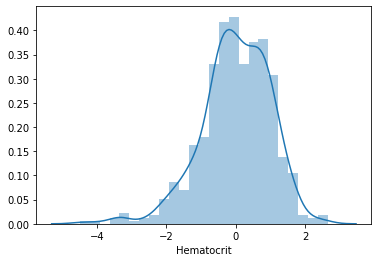

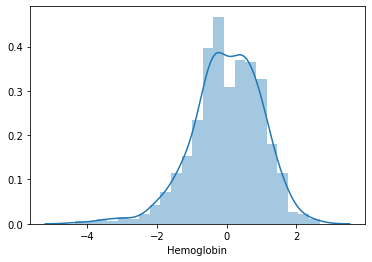

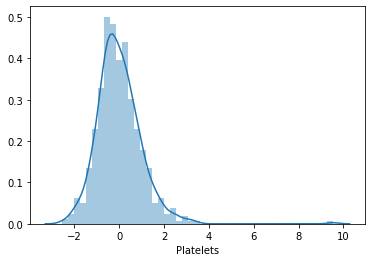

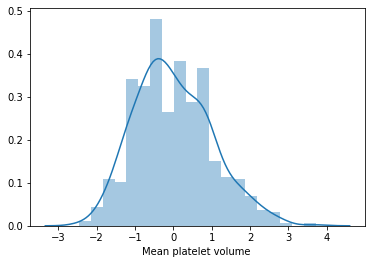

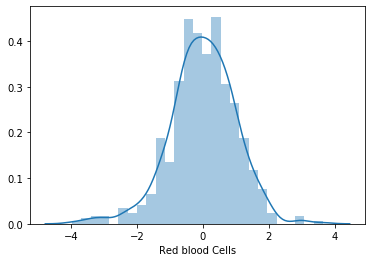

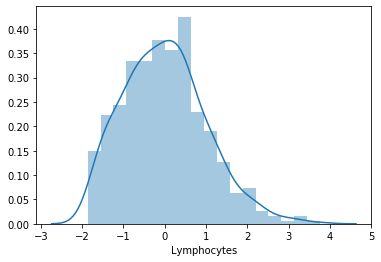

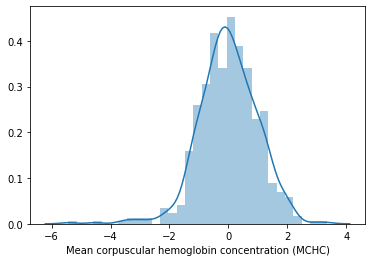

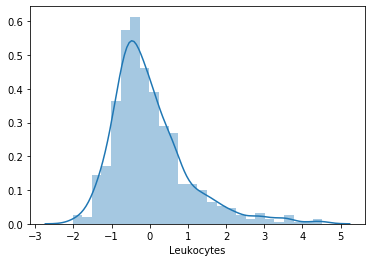

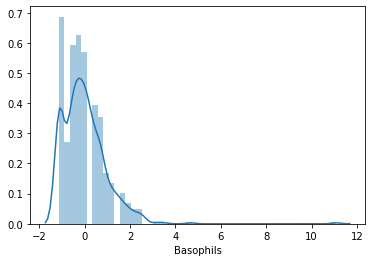

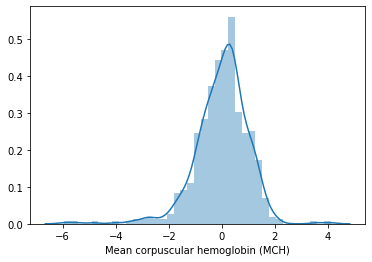

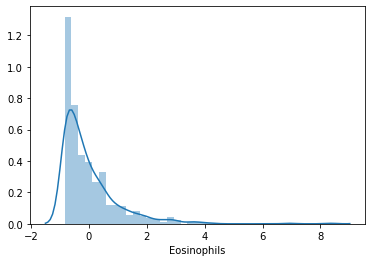

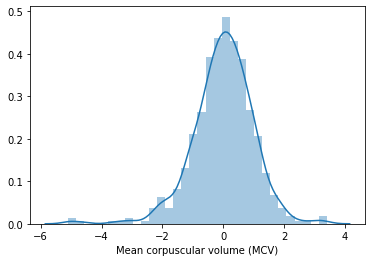

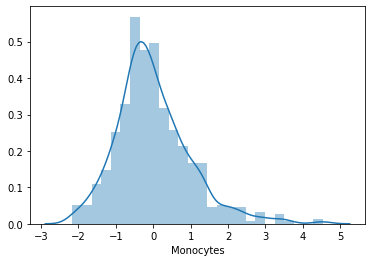

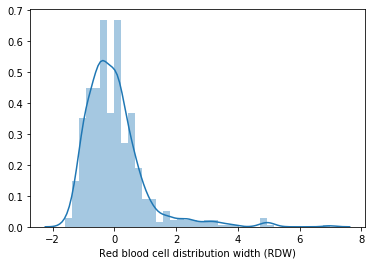

In [9]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


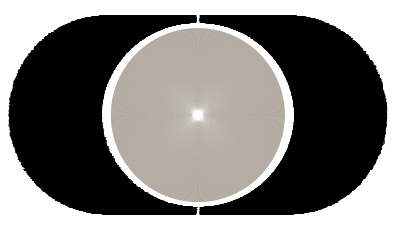

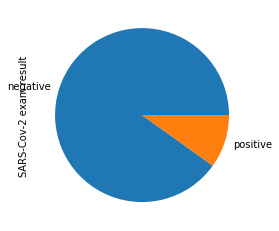

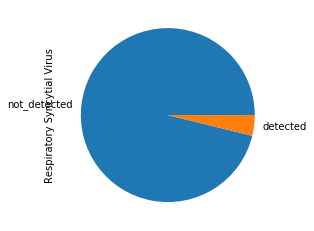

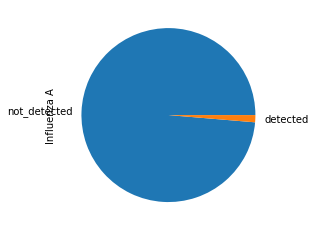

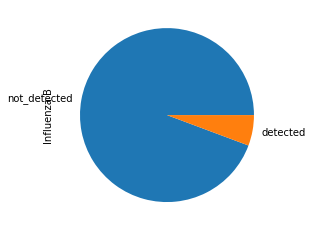

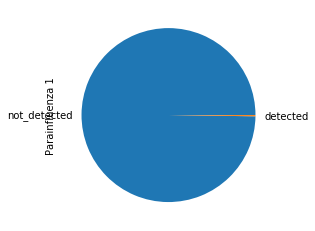

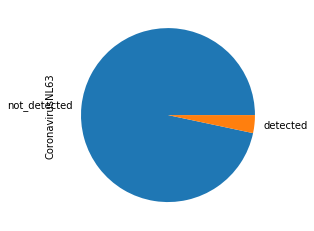

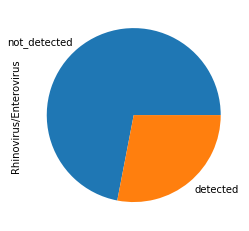

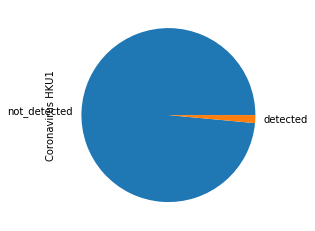

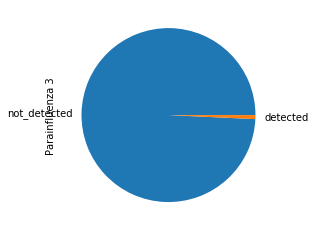

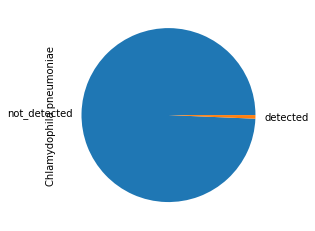

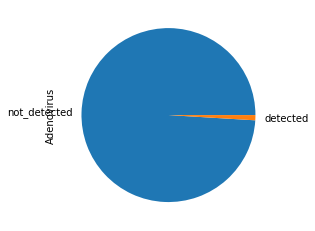

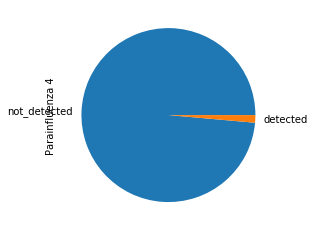

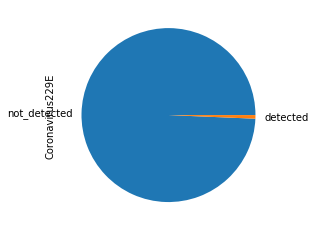

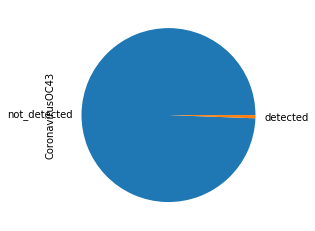

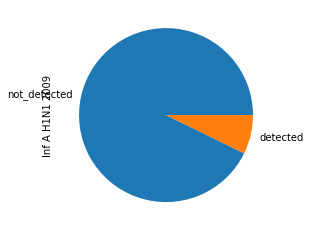

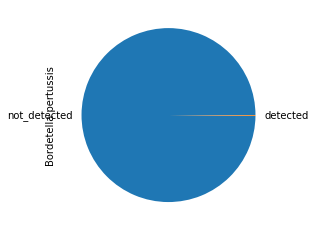

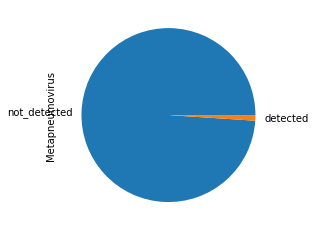

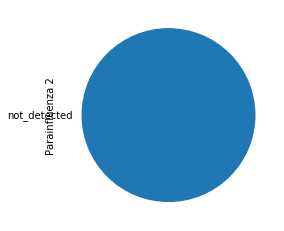

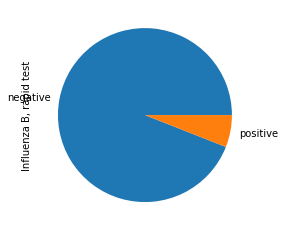

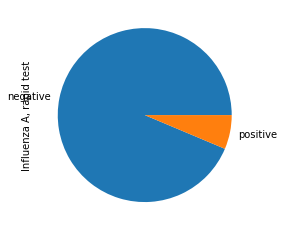

In [10]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

In [11]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']
missing_rate = df.isna().mean()
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate >0.88)]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

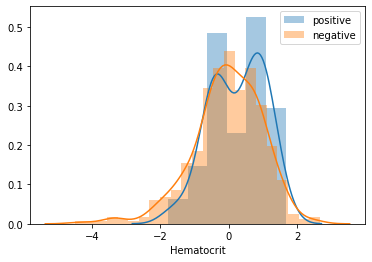

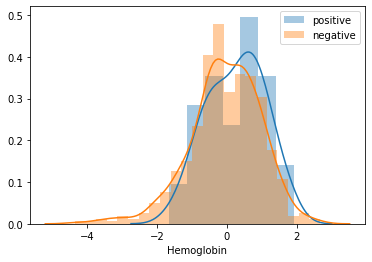

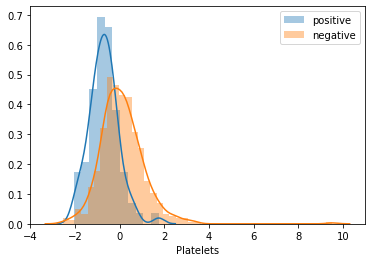

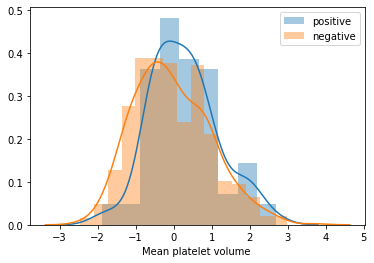

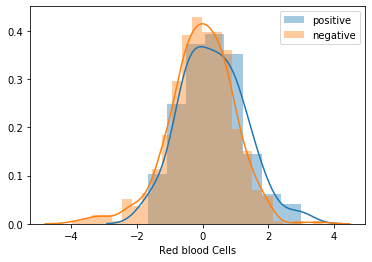

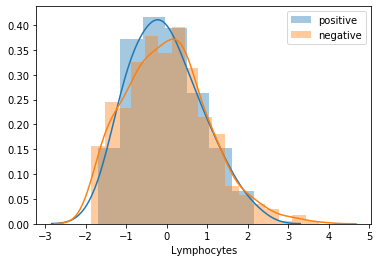

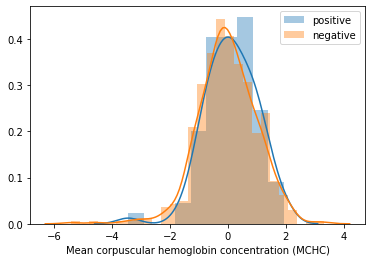

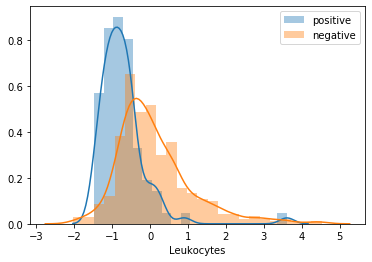

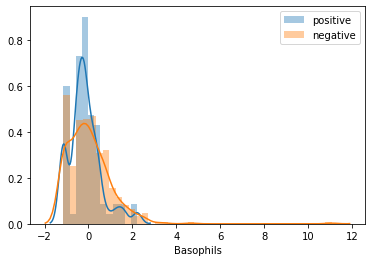

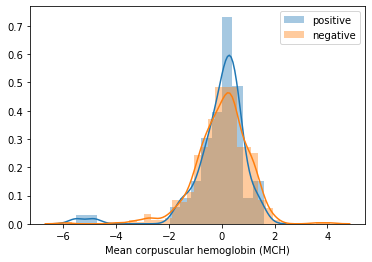

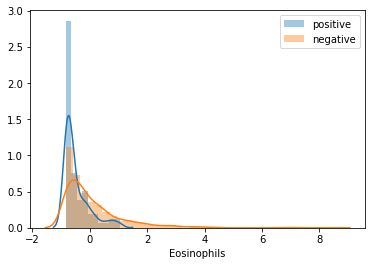

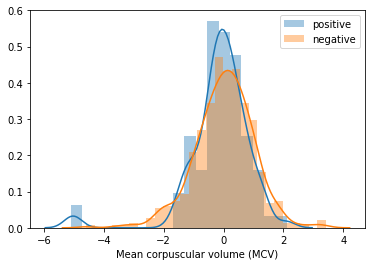

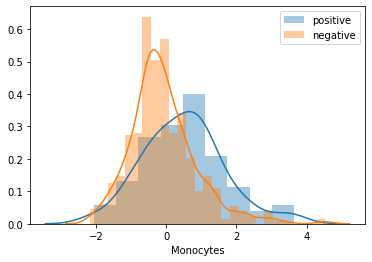

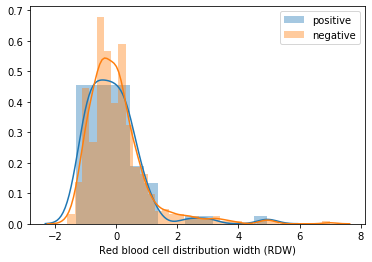

In [12]:
for col in blood_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()
    

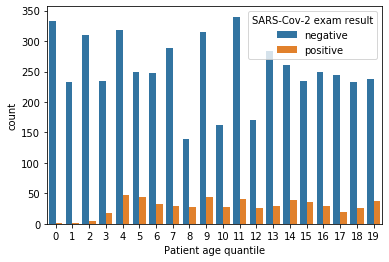

In [13]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)

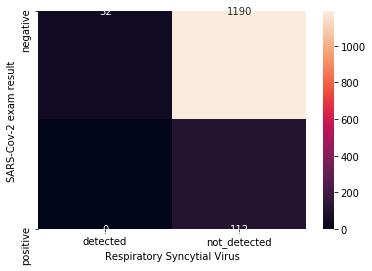

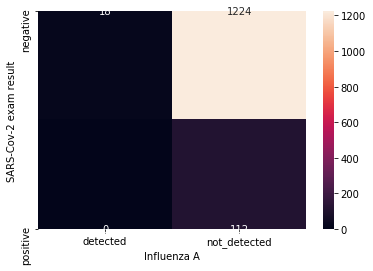

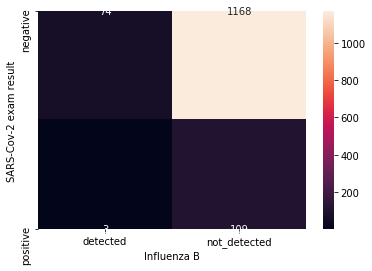

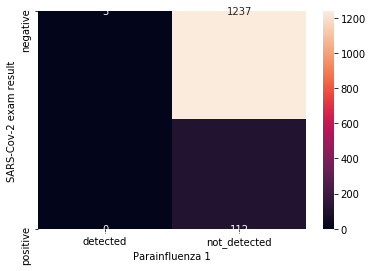

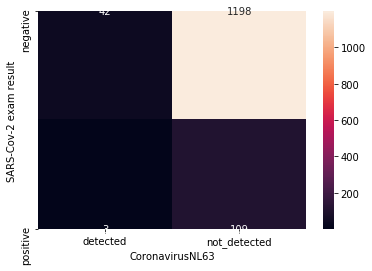

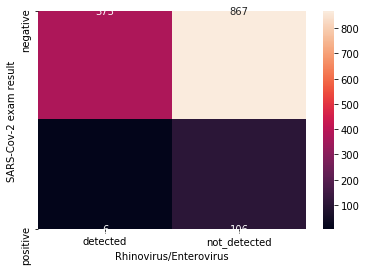

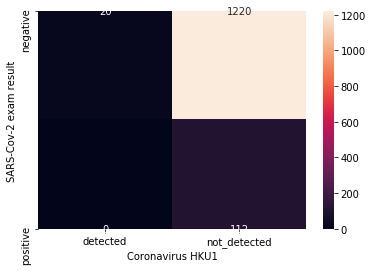

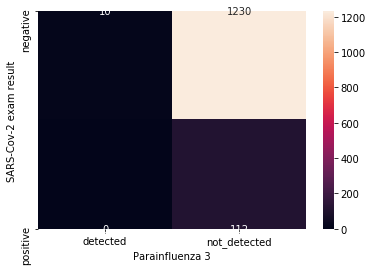

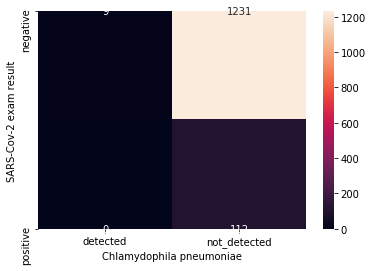

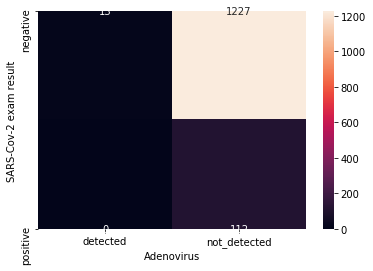

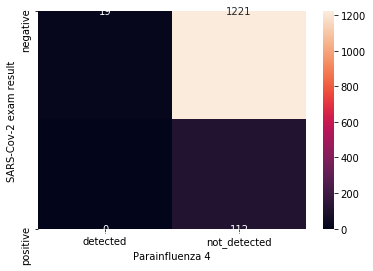

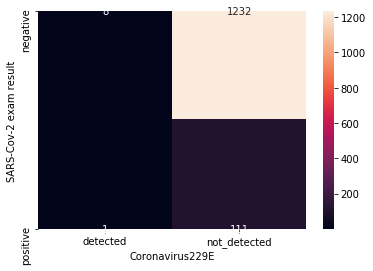

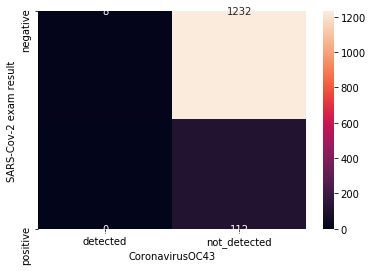

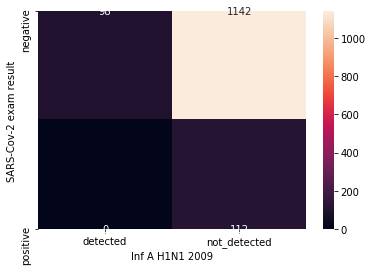

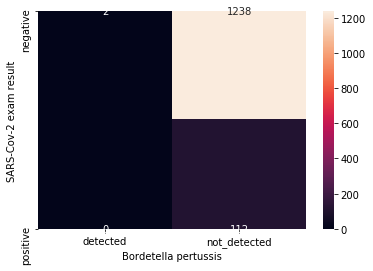

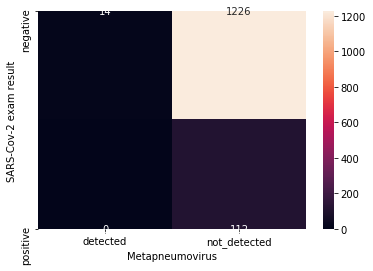

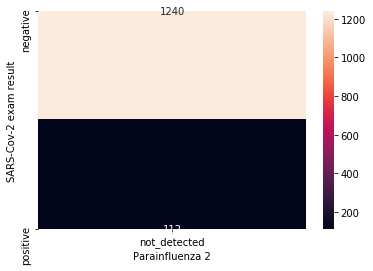

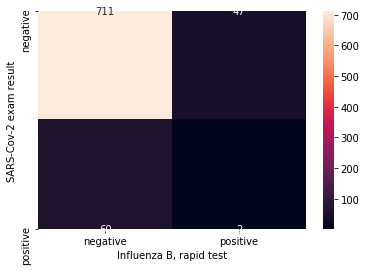

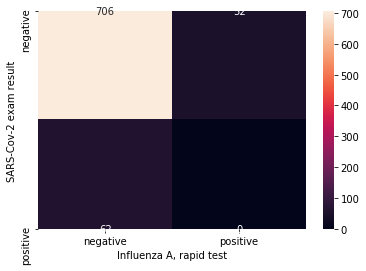

In [14]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot=True, fmt='d')


# Relation variable variable

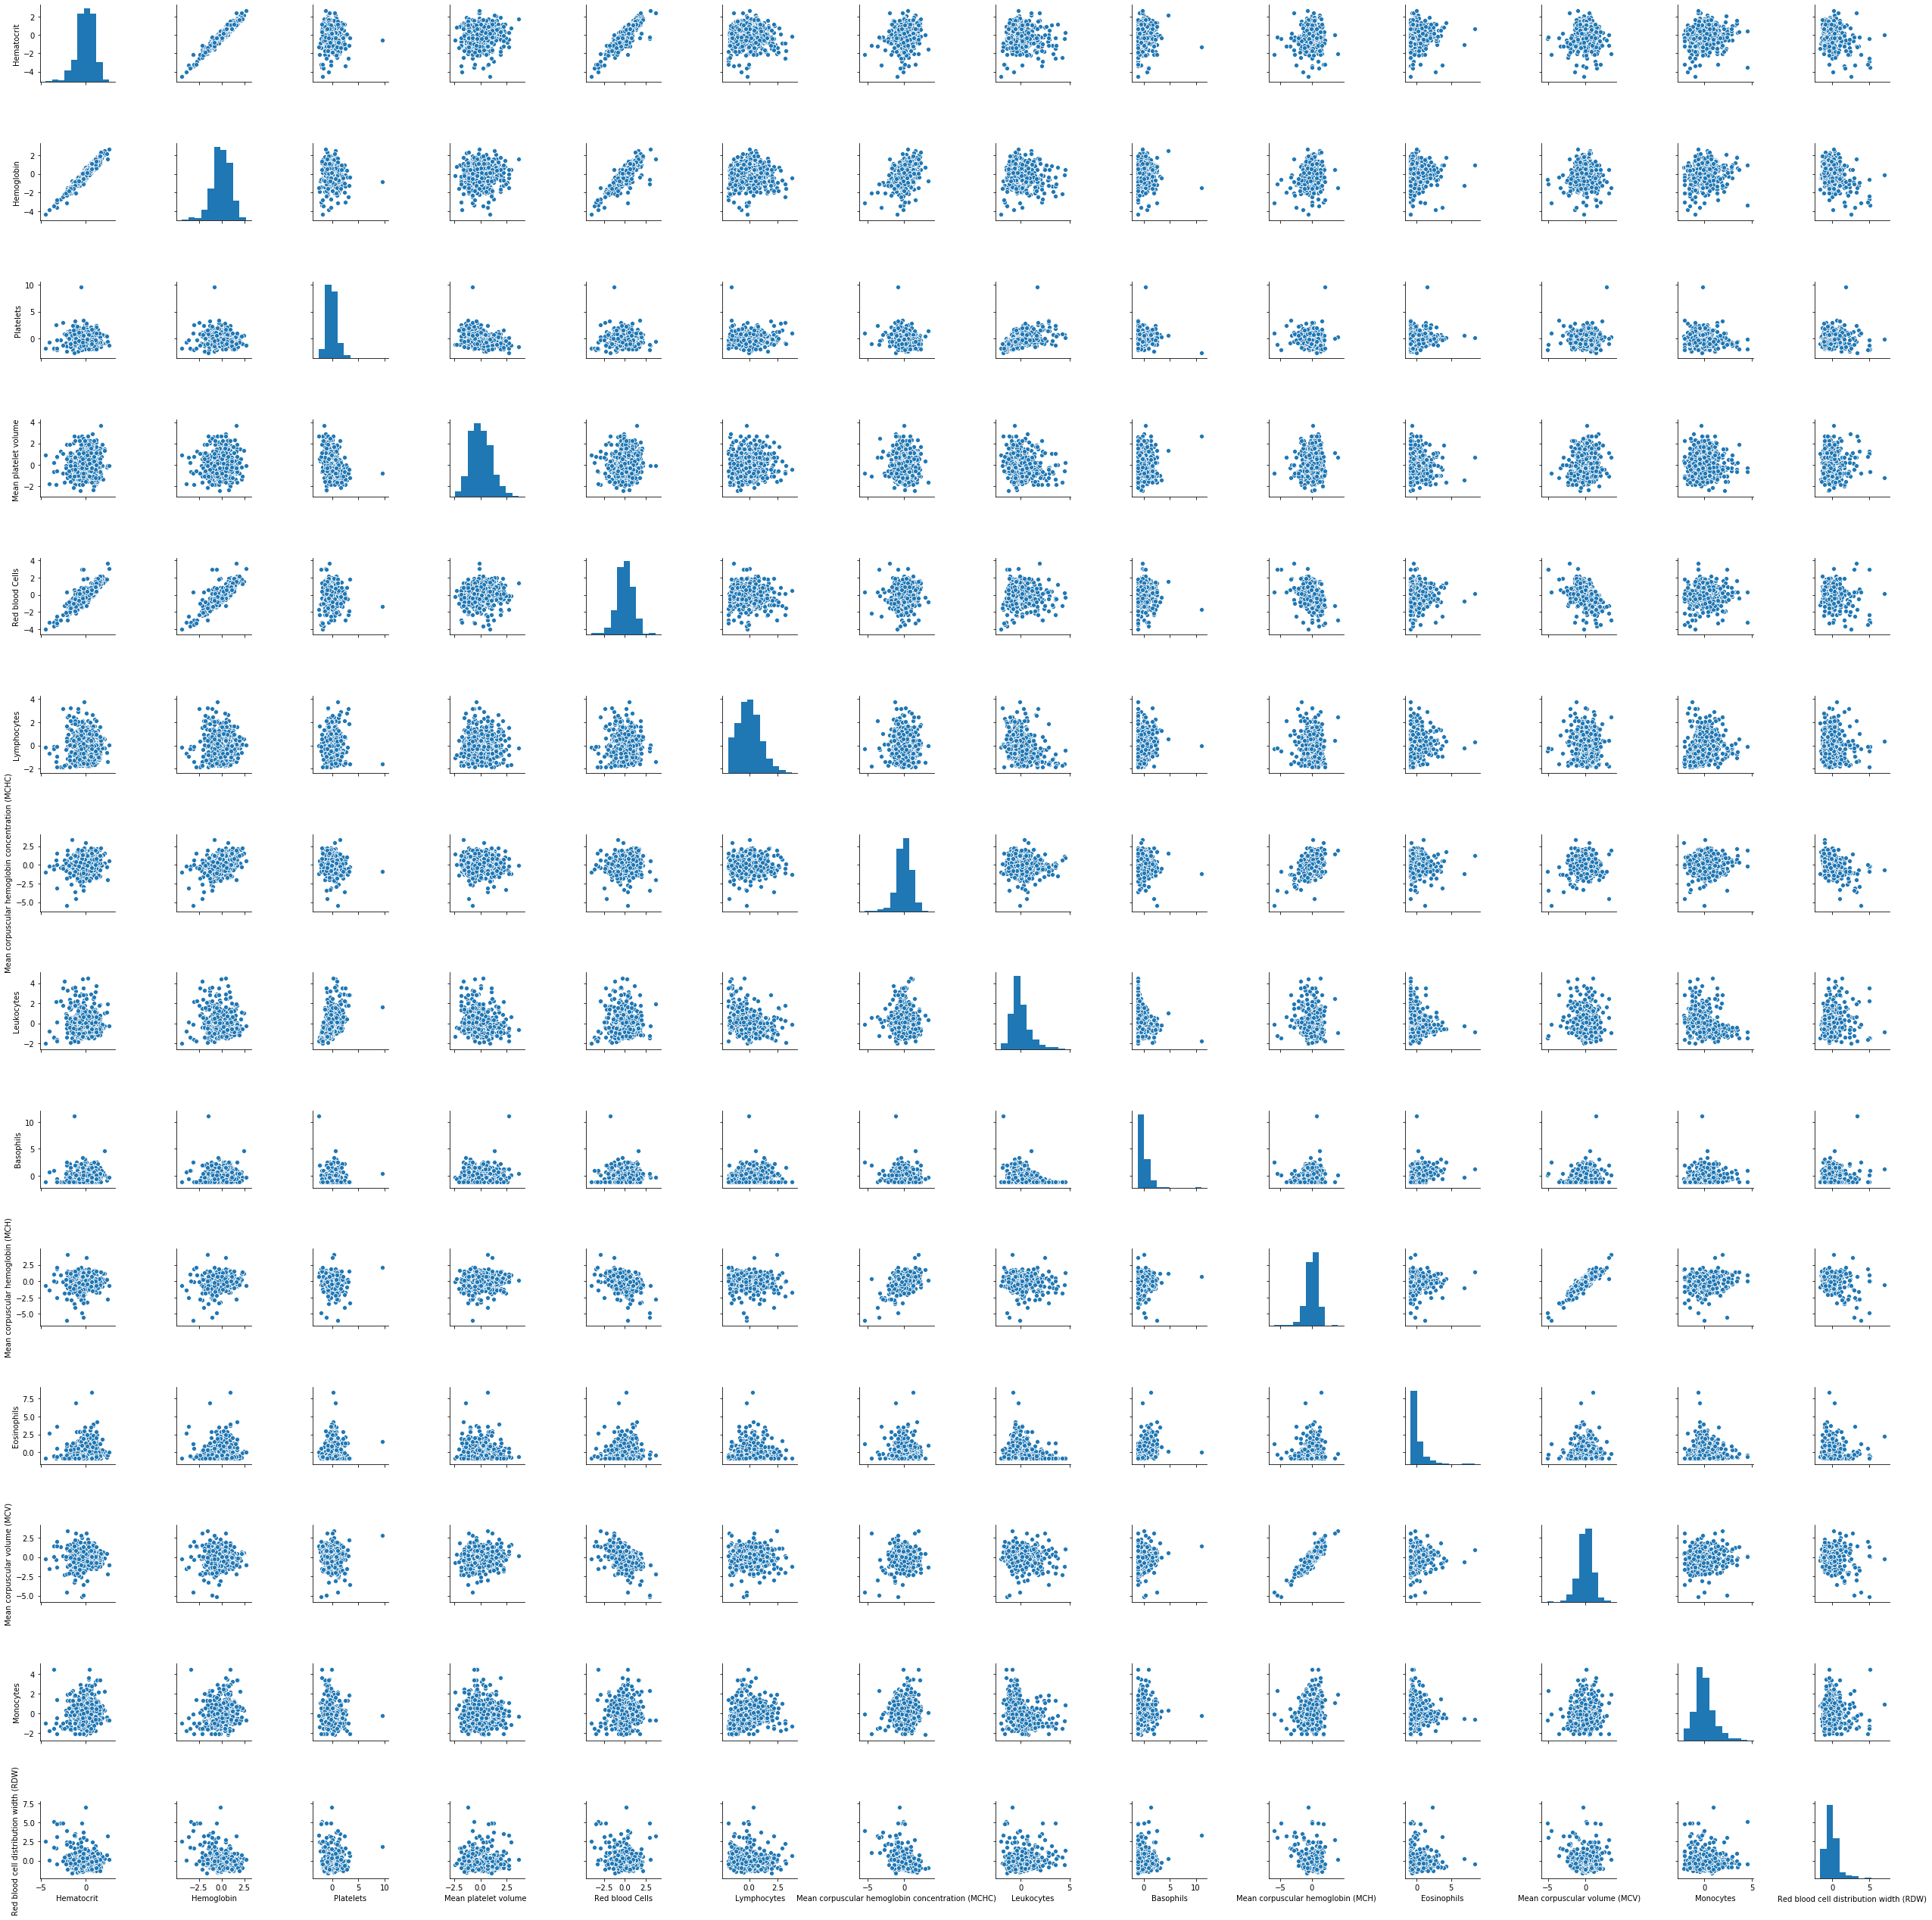

In [15]:
sns.pairplot(df[blood_columns])

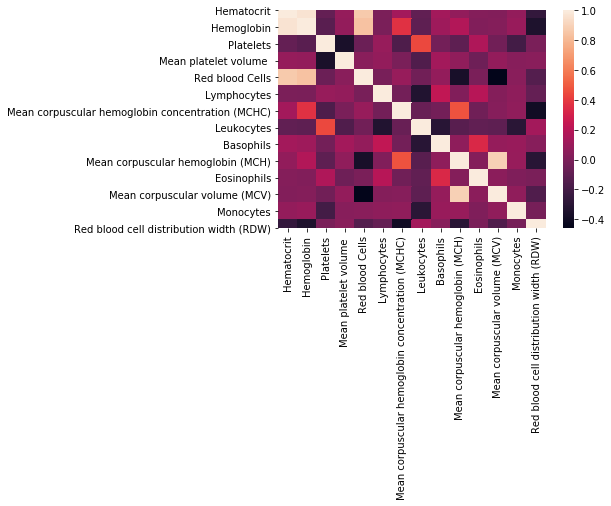

In [16]:
sns.heatmap(df[blood_columns].corr())

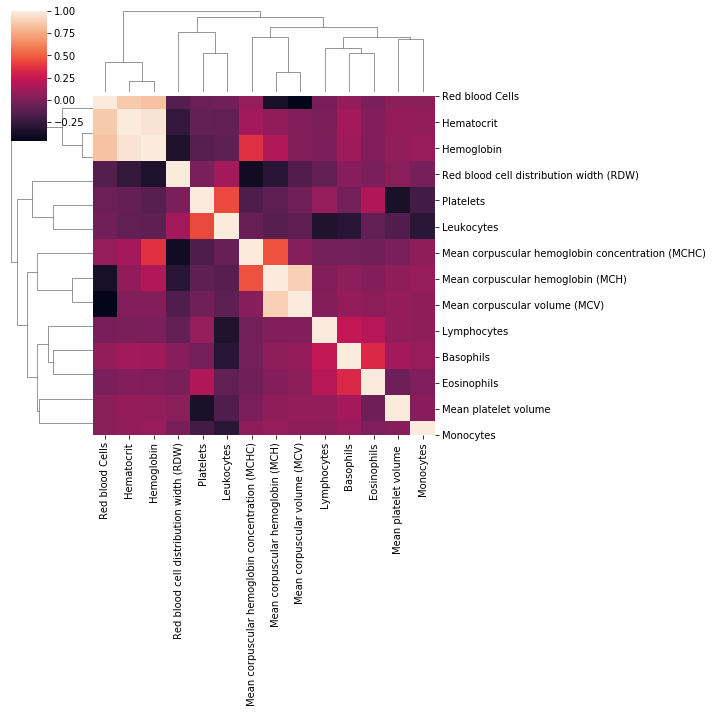

In [17]:
sns.clustermap(df[blood_columns].corr())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


<Figure size 432x288 with 0 Axes>

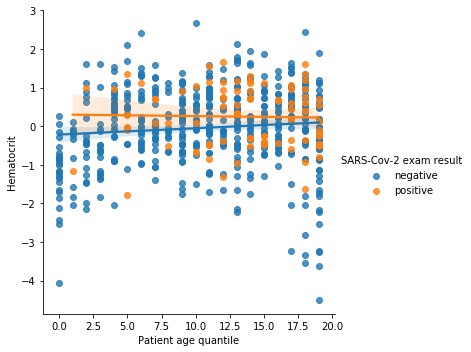

<Figure size 432x288 with 0 Axes>

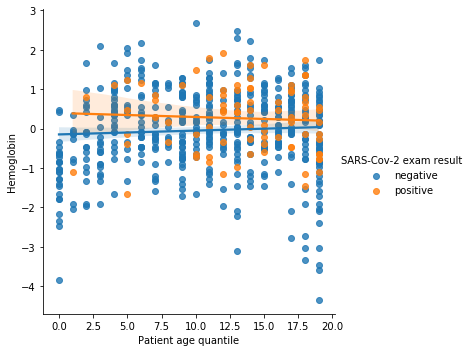

<Figure size 432x288 with 0 Axes>

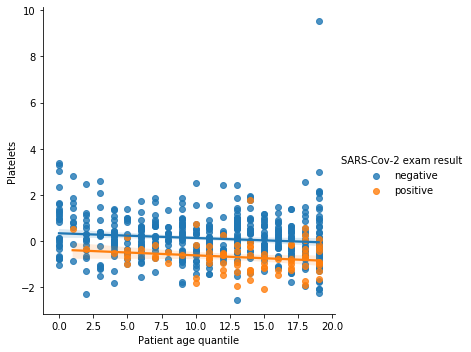

<Figure size 432x288 with 0 Axes>

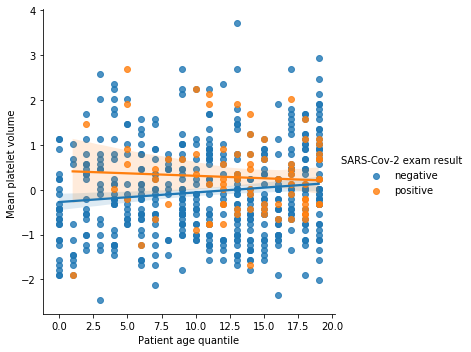

<Figure size 432x288 with 0 Axes>

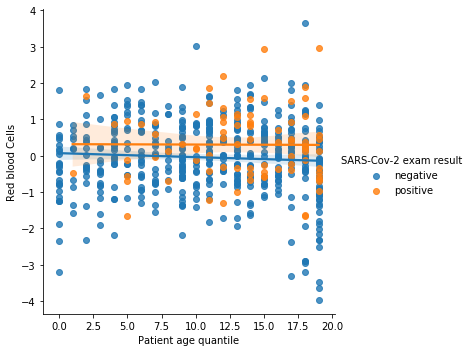

<Figure size 432x288 with 0 Axes>

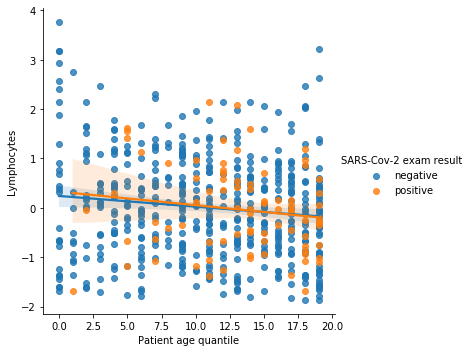

<Figure size 432x288 with 0 Axes>

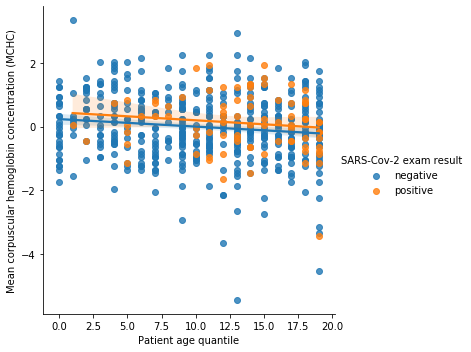

<Figure size 432x288 with 0 Axes>

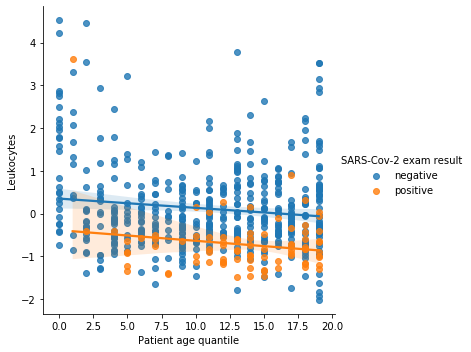

<Figure size 432x288 with 0 Axes>

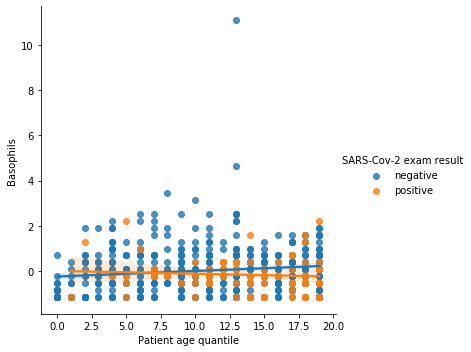

<Figure size 432x288 with 0 Axes>

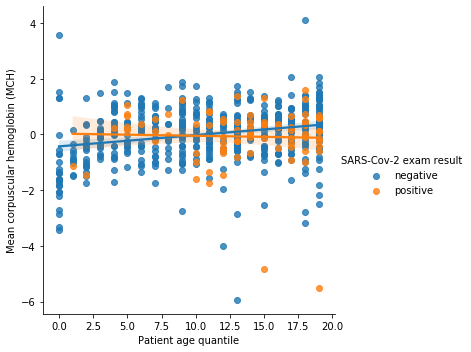

<Figure size 432x288 with 0 Axes>

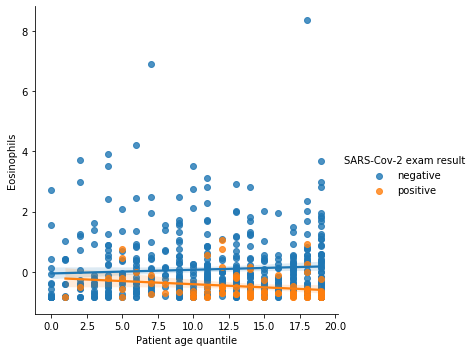

<Figure size 432x288 with 0 Axes>

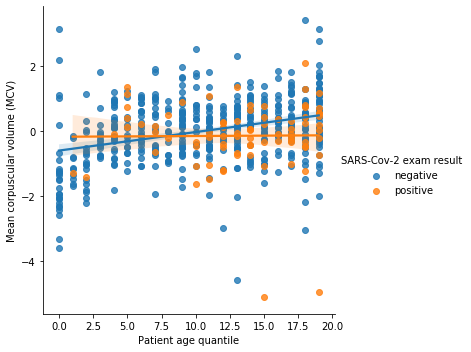

<Figure size 432x288 with 0 Axes>

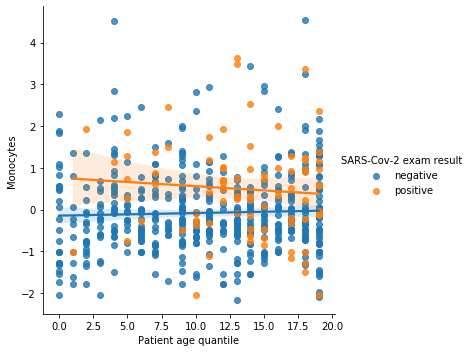

<Figure size 432x288 with 0 Axes>

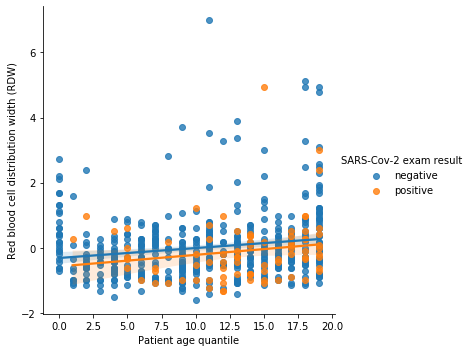

In [18]:
for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile',y=col,hue='SARS-Cov-2 exam result',data=df)

In [19]:

df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [20]:
pd.crosstab(df['Influenza A'], df['Influenza A, rapid test'],normalize=True)

Influenza A, rapid test  negative  positive
Influenza A                                
detected                 0.007519  0.015038
not_detected             0.921053  0.056391

In [21]:
pd.crosstab(df['Influenza B'], df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [22]:
df['est_malade']=np.sum(df[viral_columns[:-2]] == 'detected', axis=1)==1

In [23]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

In [24]:
malade_df = df[df['est_malade'] == True]
non_malade_df = df[df['est_malade'] == False]

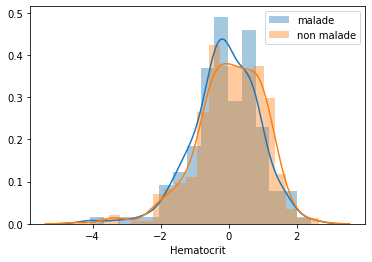

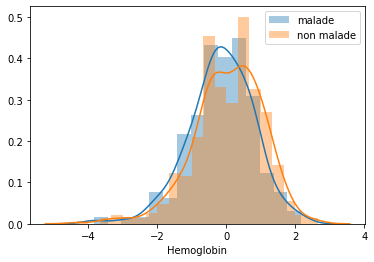

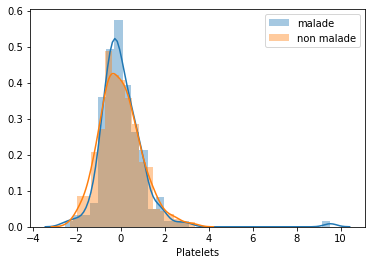

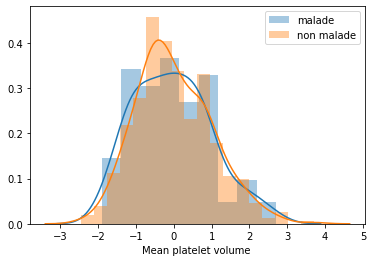

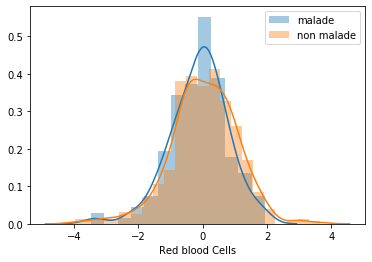

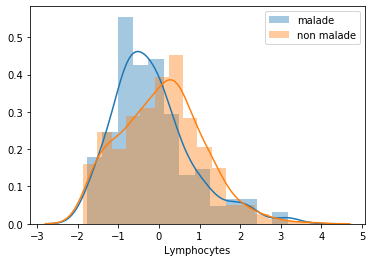

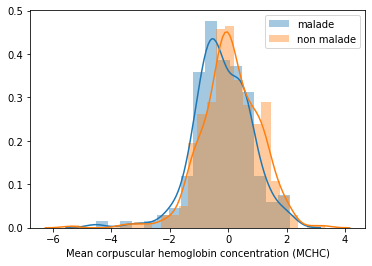

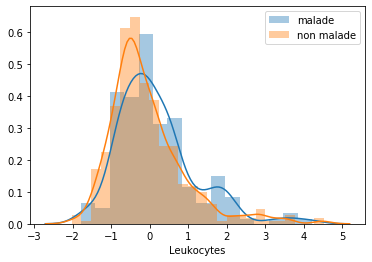

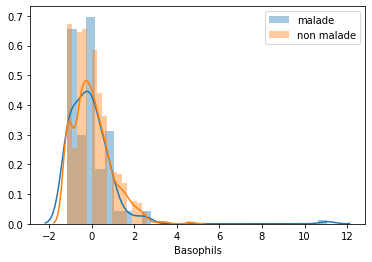

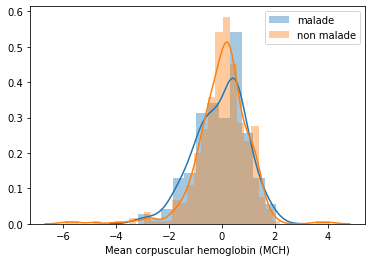

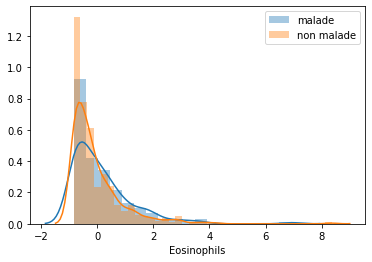

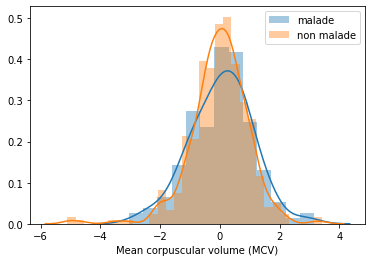

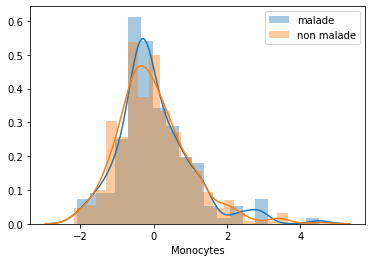

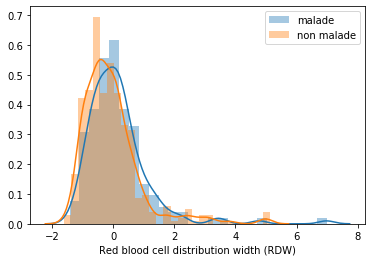

In [25]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col], label='malade')
    sns.distplot(non_malade_df[col], label='non malade')
    plt.legend()

In [26]:
def hospitalisation(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)'] == 1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)'] == 1:
        return 'soins semi-intensives'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)'] == 1:
        return 'soins intensifs'
    else:
        return 'inconnu'

In [27]:
df['statut'] = df.apply(hospitalisation, axis=1)

In [28]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  Lymphocytes  \
0         NaN        NaN                    NaN              NaN          NaN   
1    -0.02234  -0.517413               0.010677         0.102004     0.318366   
2         NaN        NaN                    NaN              NaN          NaN   
3         NaN        NaN                    NaN              NaN          NaN   
4         NaN        NaN                    NaN              NaN          NaN   

   Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  Basophils  \
0                                               NaN         NaN        NaN   
1                                          -0.95079    -0.09461  -0.223767   
2                                               NaN         NaN        NaN   
3                                               NaN         NaN        NaN   
4                                               NaN         NaN        NaN   

   Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0                                NaN          NaN   
1                          -0.292269     1.482158   
2                                NaN          NaN   
3                                NaN          NaN   
4                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN             

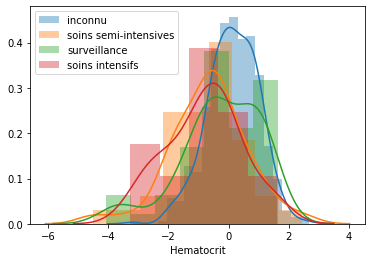

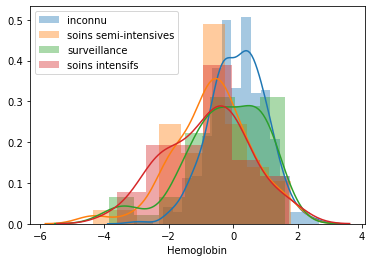

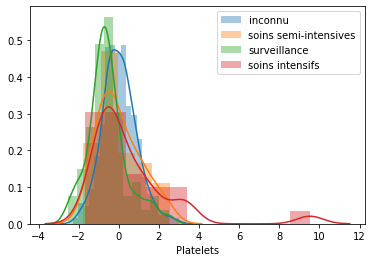

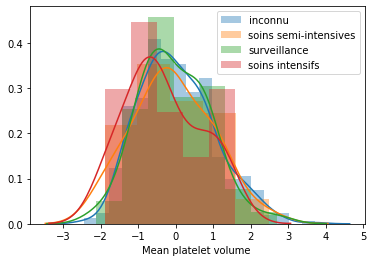

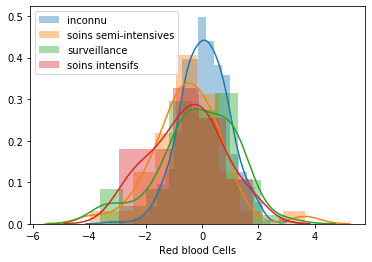

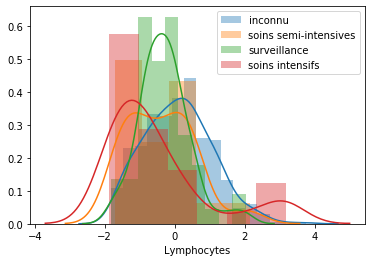

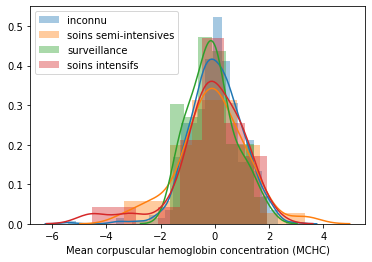

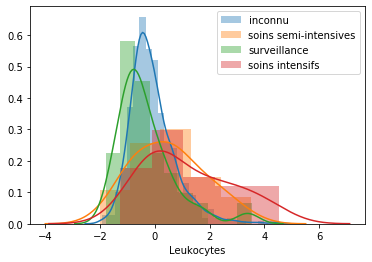

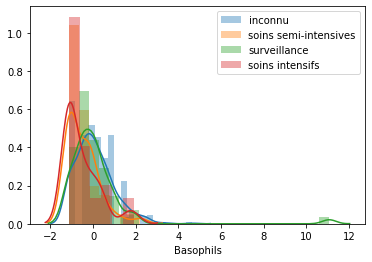

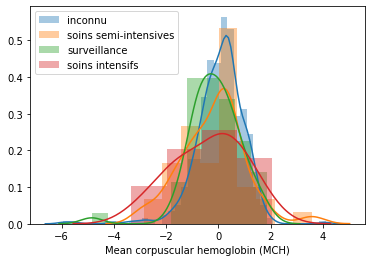

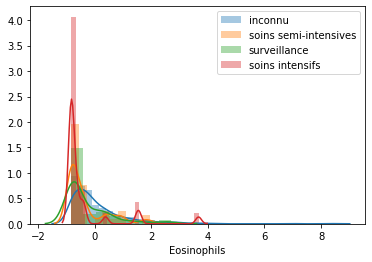

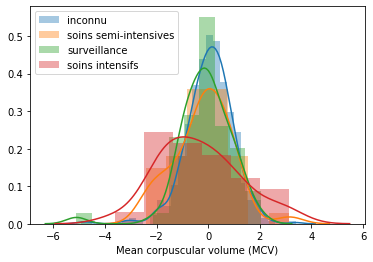

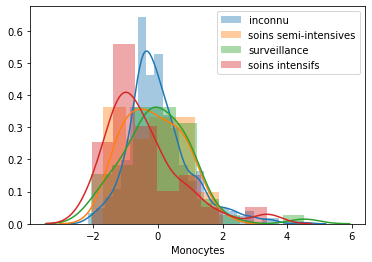

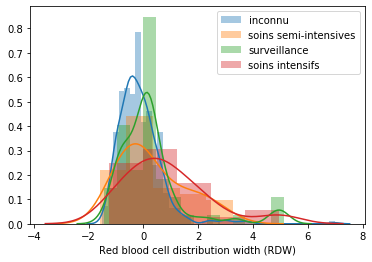

In [29]:
for col in blood_columns:
    plt.figure()
    for cat in df['statut'].unique():
        sns.distplot(df[df['statut']==cat][col], label=cat)
    plt.legend()

In [30]:
df[blood_columns].count()

Hematocrit                                          603
Hemoglobin                                          603
Platelets                                           602
Mean platelet volume                                599
Red blood Cells                                     602
Lymphocytes                                         602
Mean corpuscular hemoglobin concentration (MCHC)    602
Leukocytes                                          602
Basophils                                           602
Mean corpuscular hemoglobin (MCH)                   602
Eosinophils                                         602
Mean corpuscular volume (MCV)                       602
Monocytes                                           601
Red blood cell distribution width (RDW)             602
dtype: int64

In [31]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [32]:
df1 = df[viral_columns[:-2]]
df1['covid'] = df['SARS-Cov-2 exam result']
df1.dropna()['covid'].value_counts(normalize=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.91716
positive    0.08284
Name: covid, dtype: float64

In [33]:
df2 = df[blood_columns]
df2['covid'] = df['SARS-Cov-2 exam result']
df2.dropna()['covid'].value_counts(normalize=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


negative    0.864548
positive    0.135452
Name: covid, dtype: float64

In [34]:
from scipy.stats import ttest_ind


In [35]:
positive_df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
67    78511c183ae18bc                     7               positive   
284   d7834ed75f2da44                    16               positive   
513   b16b49f7bd3e692                    10               positive   
568   4382f5ea05e60c4                     2               positive   
676   d3729cd2658ca64                    15               positive   
...               ...                   ...                    ...   
5632  5c386388ba3c3f0                    16               positive   
5633  9f8dfe2ae239238                     4               positive   
5634  db77903261ab6d0                    15               positive   
5639  ae66feb9e4dc3a0                     3               positive   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
67                                                 0   
284                                                1   
513                                                0   
568                                                0   
676                                                0   
...                                              ...   
5632                                               0   
5633                                               0   
5634                                               0   
5639                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
67                                                    0       
284                                                   0       
513                                                   0       
568                                                   0       
676                                                   0       
...                                                 ...       
5632                                                  0       
5633                                                  0       
5634                                                  0       
5639                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
67                                                    0             NaN   
284                                                   0             NaN   
513                                                   0             NaN   
568                                                   0        0.991838   
676                                                   0             NaN   
...                                                 ...             ...   
5632                                                  0             NaN   
5633                                                  0             NaN   
5634                                                  0             NaN   
5639                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
67           NaN        NaN                    NaN              NaN   
284          NaN        NaN                    NaN              NaN   
513          NaN        NaN                    NaN              NaN   
568     0.792188  -0.341548               1.469188         1.653476   
676          NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5632         NaN        NaN                    NaN              NaN   
5633         NaN        NaN                    NaN              NaN   
5634         NaN        NaN                    NaN              NaN   
5639         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

In [36]:
balanced_neg = negative_df.sample(positive_df.shape[0])

In [37]:
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [38]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- H0 Rejetée
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- H0 Rejetée
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- 0
Red blood cell distribution width (RDW)----------- 0


## Pre_processing

In [39]:
df=dataset.copy()
df

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0     44477f75e8169d2                    13               negative   
1     126e9dd13932f68                    17               negative   
2     a46b4402a0e5696                     8               negative   
3     f7d619a94f97c45                     5               negative   
4     d9e41465789c2b5                    15               negative   
...               ...                   ...                    ...   
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                     0       
1                                                     0       
2                                                     0       
3                                                     0       
4                                                     0       
...                                                 ...       
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                     0             NaN   
1                                                     0        0.236515   
2                                                     0             NaN   
3                                                     0             NaN   
4                                                     0             NaN   
...                                                 ...             ...   
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0            NaN        NaN                    NaN              NaN   
1      -0.022340  -0.517413               0.010677         0.102004   
2            NaN        NaN                    NaN              NaN   
3            NaN        NaN                    NaN              NaN   
4            NaN        NaN                    NaN              NaN   
...          ...        ...                    ...              ...   
5639         NaN        NaN                    NaN              NaN   
5640         NaN        NaN                    NaN              NaN   
5641         NaN        NaN                    NaN              NaN   
5642         NaN        NaN                    NaN              NaN   
5643    0.541564  -0.906829              -0.325903        

In [40]:
missing_rate = df.isna().mean()
blood_columns = list(df.columns[(missing_rate < 0.9) & (missing_rate >0.88)])
viral_columns = list(df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)])

In [41]:
key_columns=blood_columns+viral_columns+['Patient age quantile','SARS-Cov-2 exam result']

In [42]:
df=df[key_columns]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)

In [45]:
trainset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.900997
positive    0.099003
Name: SARS-Cov-2 exam result, dtype: float64

In [46]:
testset['SARS-Cov-2 exam result'].value_counts(normalize=True)

negative    0.901683
positive    0.098317
Name: SARS-Cov-2 exam result, dtype: float64

In [47]:
def encodage(df):
    codage={'detected':1,
       'not_detected':0,
        'positive':1,
        'negative':0
       }
    for col in df.select_dtypes('object'):
        df[col]=df[col].map(codage)
    return df    

In [48]:
def imputation(df):
    return df.dropna(axis=0)
df.head()

Hematocrit  Hemoglobin  Platelets  Mean platelet volume   Red blood Cells  \
0         NaN         NaN        NaN                    NaN              NaN   
1    0.236515    -0.02234  -0.517413               0.010677         0.102004   
2         NaN         NaN        NaN                    NaN              NaN   
3         NaN         NaN        NaN                    NaN              NaN   
4         NaN         NaN        NaN                    NaN              NaN   

   Lymphocytes  Mean corpuscular hemoglobin concentration (MCHC)  Leukocytes  \
0          NaN                                               NaN         NaN   
1     0.318366                                          -0.95079    -0.09461   
2          NaN                                               NaN         NaN   
3          NaN                                               NaN         NaN   
4          NaN                                               NaN         NaN   

   Basophils  Mean corpuscular hemoglobin (MCH)  Eosinophils  \
0        NaN                                NaN          NaN   
1  -0.223767                          -0.292269     1.482158   
2        NaN                                NaN          NaN   
3        NaN                                NaN          NaN   
4        NaN                                NaN          NaN   

   Mean corpuscular volume (MCV)  Monocytes  \
0                            NaN        NaN   
1                       0.166192   0.357547   
2                            NaN        NaN   
3                            NaN        NaN   
4                            NaN        NaN   

   Red blood cell distribution width (RDW) Respiratory Syncytial Virus  \
0                                      NaN                         NaN   
1                                -0.625073                not_detected   
2                                      NaN                         NaN   
3                                      NaN                         NaN   
4                                      NaN                not_detected   

    Influenza A   Influenza B Parainfluenza 1 CoronavirusNL63  \
0           NaN           NaN             NaN             NaN   
1  not_detected  not_detected    not_detected    not_detected   
2           NaN           NaN             NaN             NaN   
3           NaN           NaN             NaN             NaN   
4  not_detected  not_detected    not_detected    not_detected   

  Rhinovirus/Enterovirus Coronavirus HKU1 Parainfluenza 3  \
0                    NaN              NaN             NaN   
1               detected     not_detected    not_detected   
2                    NaN              NaN             NaN   
3                    NaN              NaN             NaN   
4               detected     not_detected    not_detected   

  Chlamydophila pneumoniae    Adenovirus Parainfluenza 4 Coronavirus229E  \
0                      NaN           NaN             NaN             NaN   
1             not_detected  not_detected    not_detected    not_detected   
2                      NaN           NaN             NaN             NaN   
3                      NaN           NaN             NaN             NaN   
4             not_detected  not_detected    not_detected    not_detected   

  CoronavirusOC43 Inf A H1N1 2009 Bordetella pertussis Metapneumovirus  \
0             NaN             NaN                  NaN             NaN   
1    not_detected    not_detected         not_detected    not_detected   
2             NaN             NaN                  NaN             NaN   
3             NaN             NaN                  NaN             NaN   
4    not_detected    not_detected         not_detected    not_detected   

  Parainfluenza 2 Influenza B, rapid test Influenza A, rapid test  \
0             NaN                     NaN                     NaN   
1    not_detected                negative                negative   
2             NaN                     NaN                    

In [49]:
def pre_processing(df):
    df=encodage(df)
    df=imputation(df)
    X=df.drop('SARS-Cov-2 exam result',axis=1)
    y=df['SARS-Cov-2 exam result']
    print(X.shape)
    print(y.value_counts())
    return X,y

In [50]:
x_train,y_train=pre_processing(trainset)

(83, 34)
0    73
1    10
Name: SARS-Cov-2 exam result, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
x_test,y_test=pre_processing(testset)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(16, 34)
0    13
1     3
Name: SARS-Cov-2 exam result, dtype: int64


# Modelisation

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
model=RandomForestClassifier(random_state=0)

# Procedure d'evaluation

In [54]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report

In [55]:
from sklearn.model_selection import learning_curve

In [56]:
def evaluation(model):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    print(confusion_matrix(y_test,ypred)) 
    print(classification_report(y_test,ypred))
    N,train_score,val_score=learning_curve(model,x_train,y_train,train_sizes=np.linspace(0.1,1,10),cv=4,scoring='f1')
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train_score')    
    plt.plot(N,val_score.mean(axis=1),label='val_score')
    plt.legend()

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [62]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [63]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [64]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[12  1]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.00      0.00      0.00         3

    accuracy                           0.75        16
   macro avg       0.40      0.46      0.43        16
weighted avg       0.65      0.75      0.70        16



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  28  30  49  51  54  55  56  57  58  62  64
  82  84  87  88  89  90  91  95  97 114 116 119 120 121 122 123 127 129
 145 147 150 151 152 153 154 158 160 175 177 180 181 182 183 184 188 190
 204 206 209 210 211 212 213 217 219 232 234 237 238 239 240 241 245 247
 259 261 264 265 266 267 268 272 274 285 287 290 291 292 293 294 298 300
 310 312 315 316 317 318 319 323 325 334 336 339 340 341 342 343 347 349
 357 359 362 363 364 365 366 370 372 379 381 384 385 386 387 388 392 394
 400 402 405 406 407 408 409 413 415 420 421 422 423 424 425 426 427 428
 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 459 460 462 463 464 465 466
 467 468 469 470 472 474 476 477 478 479 480 481 482 483 484 485 486 487
 488 489 490 491 492 494 495 496 497 498 499 500 501 502 503 504 505 506
 507

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 14  15  17  18  20  21  22  23  24  28  30  48  49  51  52  54  55  56
  57  58  62  64  81  82  84  85  87  88  89  90  91  95  97 113 114 116
 117 119 120 121 122 123 127 129 144 145 147 148 150 151 152 153 154 158
 160 174 175 177 178 180 181 182 183 184 188 190 203 204 206 207 209 210
 211 212 213 217 219 231 232 234 235 237 238 239 240 241 245 247 258 259
 261 262 264 265 266 267 268 272 274 284 285 287 288 290 291 292 293 294
 298 300 309 310 312 313 315 316 317 318 319 323 325 333 334 336 337 339
 340 341 342 343 347 349 356 357 359 360 362 363 364 365 366 370 372 378
 379 381 382 384 385 386 387 388 392 394 399 400 402 403 405 406 407 408
 409 413 415 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451
 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469 470
 471

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  18  20  21  22  23  24  25  26  28  29  30  32  49  51  52  54
  55  56  57  58  59  60  62  63  64  66  82  84  85  87  88  89  90  91
  92  93  95  96  97  99 114 116 117 119 120 121 122 123 124 125 127 128
 129 131 145 147 148 150 151 152 153 154 155 156 158 159 160 162 175 177
 178 180 181 182 183 184 185 186 188 189 190 192 204 206 207 209 210 211
 212 213 214 215 217 218 219 221 232 234 235 237 238 239 240 241 242 243
 245 246 247 249 259 261 262 264 265 266 267 268 269 270 272 273 274 276
 285 287 288 290 291 292 293 294 295 296 298 299 300 302 310 312 313 315
 316 317 318 319 320 321 323 324 325 327 334 336 337 339 340 341 342 343
 344 345 347 348 349 351 357 359 360 362 363 364 365 366 367 368 370 371
 372 374 379 381 382 384 385 386 387 388 389 390 392 393 394 396 400 402
 403 405 406 407 408 409 410 411 413 414 415 417 420 421 422 423 424 425
 426

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  26  28  30  32  49  51  54  55  56  57  58
  60  62  64  66  82  84  87  88  89  90  91  93  95  97  99 114 116 119
 120 121 122 123 125 127 129 131 145 147 150 151 152 153 154 156 158 160
 162 175 177 180 181 182 183 184 186 188 190 192 204 206 209 210 211 212
 213 215 217 219 221 232 234 237 238 239 240 241 243 245 247 249 259 261
 264 265 266 267 268 270 272 274 276 285 287 290 291 292 293 294 296 298
 300 302 310 312 315 316 317 318 319 321 323 325 327 334 336 339 340 341
 342 343 345 347 349 351 357 359 362 363 364 365 366 368 370 372 374 379
 381 384 385 386 387 388 390 392 394 396 400 402 405 406 407 408 409 411
 413 415 417 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434
 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452
 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469 470 471
 472

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  25  26  28  29  30  32  49  51  54  55  56
  57  58  59  60  62  63  64  66  82  84  87  88  89  90  91  92  93  95
  96  97  99 114 116 119 120 121 122 123 124 125 127 128 129 131 145 147
 150 151 152 153 154 155 156 158 159 160 162 175 177 180 181 182 183 184
 185 186 188 189 190 192 204 206 209 210 211 212 213 214 215 217 218 219
 221 232 234 237 238 239 240 241 242 243 245 246 247 249 259 261 264 265
 266 267 268 269 270 272 273 274 276 285 287 290 291 292 293 294 295 296
 298 299 300 302 310 312 315 316 317 318 319 320 321 323 324 325 327 334
 336 339 340 341 342 343 344 345 347 348 349 351 357 359 362 363 364 365
 366 367 368 370 371 372 374 379 381 384 385 386 387 388 389 390 392 393
 394 396 400 402 405 406 407 408 409 410 411 413 414 415 417 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  25  28  30  49  51  54  55  56  57  58  59
  62  64  82  84  87  88  89  90  91  92  95  97 114 116 119 120 121 122
 123 124 127 129 145 147 150 151 152 153 154 155 158 160 175 177 180 181
 182 183 184 185 188 190 204 206 209 210 211 212 213 214 217 219 232 234
 237 238 239 240 241 242 245 247 259 261 264 265 266 267 268 269 272 274
 285 287 290 291 292 293 294 295 298 300 310 312 315 316 317 318 319 320
 323 325 334 336 339 340 341 342 343 344 347 349 357 359 362 363 364 365
 366 367 370 372 379 381 384 385 386 387 388 389 392 394 400 402 405 406
 407 408 409 410 413 415 420 421 422 423 424 425 426 427 428 429 430 431
 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 459 460 462 463 464 465 466 467 468 469
 470 472 474 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490
 491

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  25  28  29  30  32  49  51  54  55  56  57
  58  59  62  63  64  66  82  84  87  88  89  90  91  92  95  96  97  99
 114 116 119 120 121 122 123 124 127 128 129 131 145 147 150 151 152 153
 154 155 158 159 160 162 175 177 180 181 182 183 184 185 188 189 190 192
 204 206 209 210 211 212 213 214 217 218 219 221 232 234 237 238 239 240
 241 242 245 246 247 249 259 261 264 265 266 267 268 269 272 273 274 276
 285 287 290 291 292 293 294 295 298 299 300 302 310 312 315 316 317 318
 319 320 323 324 325 327 334 336 339 340 341 342 343 344 347 348 349 351
 357 359 362 363 364 365 366 367 370 371 372 374 379 381 384 385 386 387
 388 389 392 393 394 396 400 402 405 406 407 408 409 410 413 414 415 417
 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437
 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455
 456

AdaBoost
[[12  1]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.00      0.00      0.00         3

    accuracy                           0.75        16
   macro avg       0.40      0.46      0.43        16
weighted avg       0.65      0.75      0.70        16



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  28  30  49  51  54  55  56  57  58  62  64
  82  84  87  88  89  90  91  95  97 114 116 119 120 121 122 123 127 129
 145 147 150 151 152 153 154 158 160 175 177 180 181 182 183 184 188 190
 204 206 209 210 211 212 213 217 219 232 234 237 238 239 240 241 245 247
 259 261 264 265 266 267 268 272 274 285 287 290 291 292 293 294 298 300
 310 312 315 316 317 318 319 323 325 334 336 339 340 341 342 343 347 349
 357 359 362 363 364 365 366 370 372 379 381 384 385 386 387 388 392 394
 400 402 405 406 407 408 409 413 415 420 421 422 423 424 425 426 427 428
 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 459 460 462 463 464 465 466
 467 468 469 470 472 474 476 477 478 479 480 481 482 483 484 485 486 487
 488 489 490 491 492 494 495 496 497 498 499 500 501 502 503 504 505 506
 507

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 14  15  17  18  20  21  22  23  24  28  30  48  49  51  52  54  55  56
  57  58  62  64  81  82  84  85  87  88  89  90  91  95  97 113 114 116
 117 119 120 121 122 123 127 129 144 145 147 148 150 151 152 153 154 158
 160 174 175 177 178 180 181 182 183 184 188 190 203 204 206 207 209 210
 211 212 213 217 219 231 232 234 235 237 238 239 240 241 245 247 258 259
 261 262 264 265 266 267 268 272 274 284 285 287 288 290 291 292 293 294
 298 300 309 310 312 313 315 316 317 318 319 323 325 333 334 336 337 339
 340 341 342 343 347 349 356 357 359 360 362 363 364 365 366 370 372 378
 379 381 382 384 385 386 387 388 392 394 399 400 402 403 405 406 407 408
 409 413 415 419 420 421 422 423 424 425 426 427 428 429 430 431 432 433
 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451
 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469 470
 471

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  18  20  21  22  23  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  26  28  30  32  49  51  54  55  56  57  58
  60  62  64  66  82  84  87  88  89  90  91  93  95  97  99 114 116 119
 120 121 122 123 125 127 129 131 145 147 150 151 152 153 154 156 158 160
 162 175 177 180 181 182 183 184 186 188 190 192 204 206 209 210 211 212
 213 215 217 219 221 232 234 237 238 239 240 241 243 245 247 249 259 261
 264 265 266 267 268 270 272 274 276 285 287 290 291 292 293 294 296 298
 300 302 310 312 315 316 317 318 319 321 323 325 327 334 336 339 340 341
 342 343 345 347 349 351 357 359 362 363 364 365 366 368 370 372 374 379
 381 384 385 386 387 388 390 392 394 396 400 402 405 406 407 408 409 411
 413 415 417 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434
 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452
 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469 470 471
 472

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  18  20  21  22  23  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  25  28  29  30  49  51  54  55  56  57  58
  59  62  63  64  82  84  87  88  89  90  91  92  95  96  97 114 116 119
 120 121 122 123 124 127 128 129 145 147 150 151 152 153 154 155 158 159
 160 175 177 180 181 182 183 184 185 188 189 190 204 206 209 210 211 212
 213 214 217 218 219 232 234 237 238 239 240 241 242 245 246 247 259 261
 264 265 266 267 268 269 272 273 274 285 287 290 291 292 293 294 295 298
 299 300 310 312 315 316 317 318 319 320 323 324 325 334 336 339 340 341
 342 343 344 347 348 349 357 359 362 363 364 365 366 367 370 371 372 379
 381 384 385 386 387 388 389 392 393 394 400 402 405 406 407 408 409 410
 413 414 415 420 421 422 423 424 425 426 427 428 429 430 431 432 433 434
 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452
 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469 470 471
 472

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  25  26  28  29  30  32  49  51  54  55  56
  57  58  59  60  62  63  64  66  82  84  87  88  89  90  91  92  93  95
  96  97  99 114 116 119 120 121 122 123 124 125 127 128 129 131 145 147
 150 151 152 153 154 155 156 158 159 160 162 175 177 180 181 182 183 184
 185 186 188 189 190 192 204 206 209 210 211 212 213 214 215 217 218 219
 221 232 234 237 238 239 240 241 242 243 245 246 247 249 259 261 264 265
 266 267 268 269 270 272 273 274 276 285 287 290 291 292 293 294 295 296
 298 299 300 302 310 312 315 316 317 318 319 320 321 323 324 325 327 334
 336 339 340 341 342 343 344 345 347 348 349 351 357 359 362 363 364 365
 366 367 368 370 371 372 374 379 381 384 385 386 387 388 389 390 392 393
 394 396 400 402 405 406 407 408 409 410 411 413 414 415 417 420 421 422
 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440
 441

SVM
[[13  0]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       0.00      0.00      0.00         3

    accuracy                           0.81        16
   macro avg       0.41      0.50      0.45        16
weighted avg       0.66      0.81      0.73        16



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [ 15  17  20  21  22  23  24  28  30  49  51  54  55  56  57  58  62  64
  82  84  87  88  89  90  91  95  97 114 116 119 120 121 122 123 127 129
 145 147 150 151 152 153 154 158 160 175 177 180 181 182 183 184 188 190
 204 206 209 210 211 212 213 217 219 232 234 237 238 239 240 241 245 247
 259 261 264 265 266 267 268 272 274 285 287 290 291 292 293 294 298 300
 310 312 315 316 317 318 319 323 325 334 336 339 340 341 342 343 347 349
 357 359 362 363 364 365 366 370 372 379 381 384 385 386 387 388 392 394
 400 402 405 406 407 408 409 413 415 420 421 422 423 424 425 426 427 428
 429 430 431 432 433 434 435 436 437 438 439 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 459 460 462 463 464 465 466
 467 468 469 470 472 474 476 477 478 479 480 481 482 483 484 485 486 487
 488 489 490 491 492 494 495 496 497 498 499 500 501 502 503 504 505 506
 507

ValueError: The number of classes has to be greater than one; got 1 class

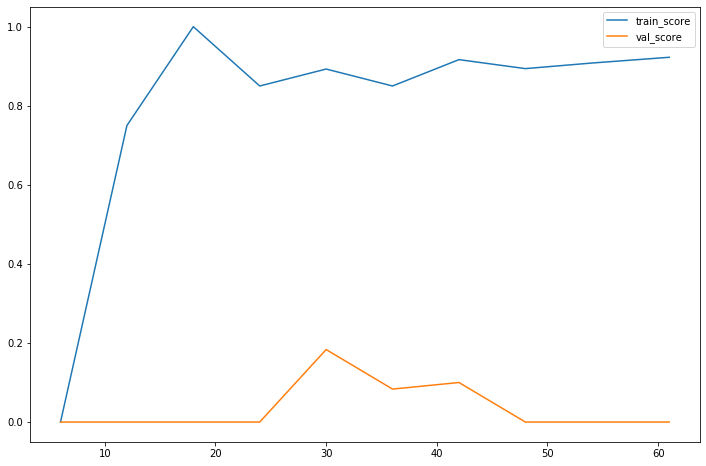

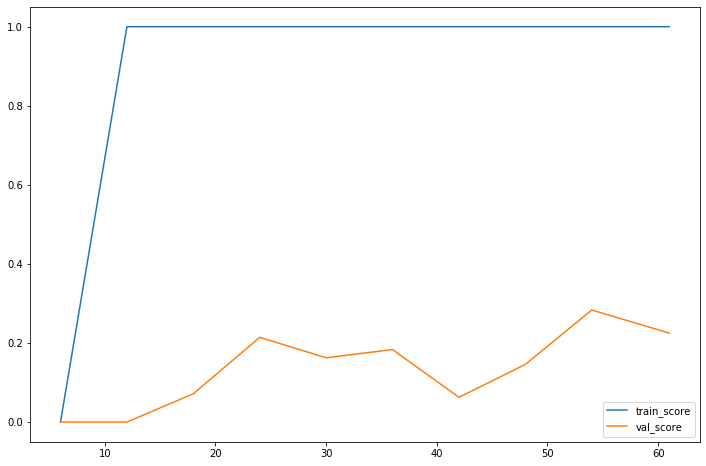

In [65]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)